In [4]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans
from imagem import Imagem
from skimage.filters.rank import mean
from skimage.filters.thresholding import threshold_otsu
from glob import glob
from skimage.io import imsave
from otsu_niblack import otsu, niblack
#from ..Atividade03.imagem import Imagem

In [5]:
aux = glob('./ultrassound/cropped/*', recursive=True)

In [8]:
aux

['./ultrassound/cropped/1886008433.bmp',
 './ultrassound/cropped/1901207007.bmp',
 './ultrassound/cropped/1903310001.bmp',
 './ultrassound/cropped/1912212047.bmp',
 './ultrassound/cropped/516808004.bmp',
 './ultrassound/cropped/1901211010.bmp',
 './ultrassound/cropped/1903711026.bmp',
 './ultrassound/cropped/1105108002.bmp',
 './ultrassound/cropped/1903709091.bmp',
 './ultrassound/cropped/1100212030.bmp',
 './ultrassound/cropped/1100212031.bmp',
 './ultrassound/cropped/1903711020.bmp',
 './ultrassound/cropped/1100211016.bmp',
 './ultrassound/cropped/1100212021.bmp',
 './ultrassound/cropped/1901206033.bmp',
 './ultrassound/cropped/1100212057.bmp',
 './ultrassound/cropped/1100210009.bmp',
 './ultrassound/cropped/1905011014.bmp',
 './ultrassound/cropped/1901212033.bmp',
 './ultrassound/cropped/1100212040.bmp',
 './ultrassound/cropped/1907107099.bmp',
 './ultrassound/cropped/1882909271.bmp',
 './ultrassound/cropped/1903309056.bmp',
 './ultrassound/cropped/1100211017.bmp',
 './ultrassound/c

In [11]:
s = './ultrassound/cropped/1901208041.bmp'
print(s.replace('./ultrassound/cropped/',' '))
print(s)

 1901208041.bmp
./ultrassound/cropped/1901208041.bmp


In [15]:
def aplica_kmeans(imagens):
    for i in imagens:
        img = Imagem(i)
        img.ler()
        img_media = mean(img.dimensoes[0], np.ones((10,10)))
        kmeans = KMeans(n_clusters = 2)
        trimg = np.reshape(img_media, (-1,1))
        kmeans.fit(trimg)
        result = (kmeans.labels_.reshape(img_media.shape))
        local = i
        new = './results/kmeans/' + local.replace("./ultrassound/cropped/","")
        imsave(new,result)

In [10]:
def aplica_otsu_niblack(imagens):
    for i in imagens:
        img = Imagem(i)
        img.ler()
        o = otsu(img.dimensoes[0])
        n = niblack(img.dimensoes[0], ws=25, k=0.8)
        local = i
        new1 = './results/otsu/' + local.replace("./ultrassound/cropped/","") 
        new2 = './results/niblack/' + local.replace("./ultrassound/cropped/","") 
        plt.imsave(new1,o,cmap='gray')
        plt.imsave(new2,n,cmap='gray')


In [11]:
aplica_otsu_niblack(aux)

In [16]:
aplica_kmeans(aux)

/home/viniciusdb/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_8120/3937909624.py:12: UserWarning: ./results/kmeans/1886008433.bmp is a low contrast image
  imsave(new,result)
/home/viniciusdb/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_8120/3937909624.py:12: UserWarning: ./results/kmeans/1901207007.bmp is a low contrast image
  imsave(new,result)
/home/viniciusdb/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipyk

Fontes:
- https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572

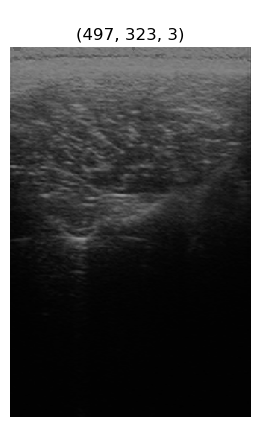

In [17]:
img = Imagem('ultrassound/cropped/503311001.bmp')
img.ler()
img.show()

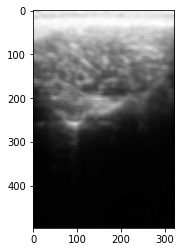

In [ ]:
img_media = mean(img.dimensoes[0], np.ones((10,10)))
plt.imshow(img_media, cmap='gray')

In [ ]:
kmeans = KMeans(n_clusters = 3)

In [ ]:
b = np.reshape(img_media, (-1,1))
kmeans.fit(b)

KMeans(n_clusters=3)

In [ ]:
result = (kmeans.labels_.reshape(img_media.shape))

In [ ]:
img.dimensoes[0].shape

(497, 323)

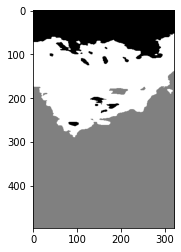

In [ ]:
plt.imshow(result, cmap='gray')

In [ ]:
def mostra(result, n=3):
    for i in range(n):
        r = result == i
        plt.imshow(r, cmap='gray')
        plt.show()

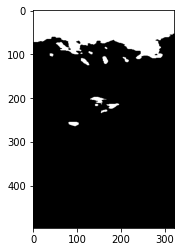

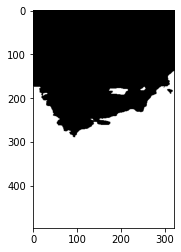

In [ ]:
mostra(result, 2)